#Procesamiento de Lenguaje Natural - NLP
### Luis Gabriel Moreno Sandoval - morenoluis@javeriana.edu.co ###
### IR - Step by Step

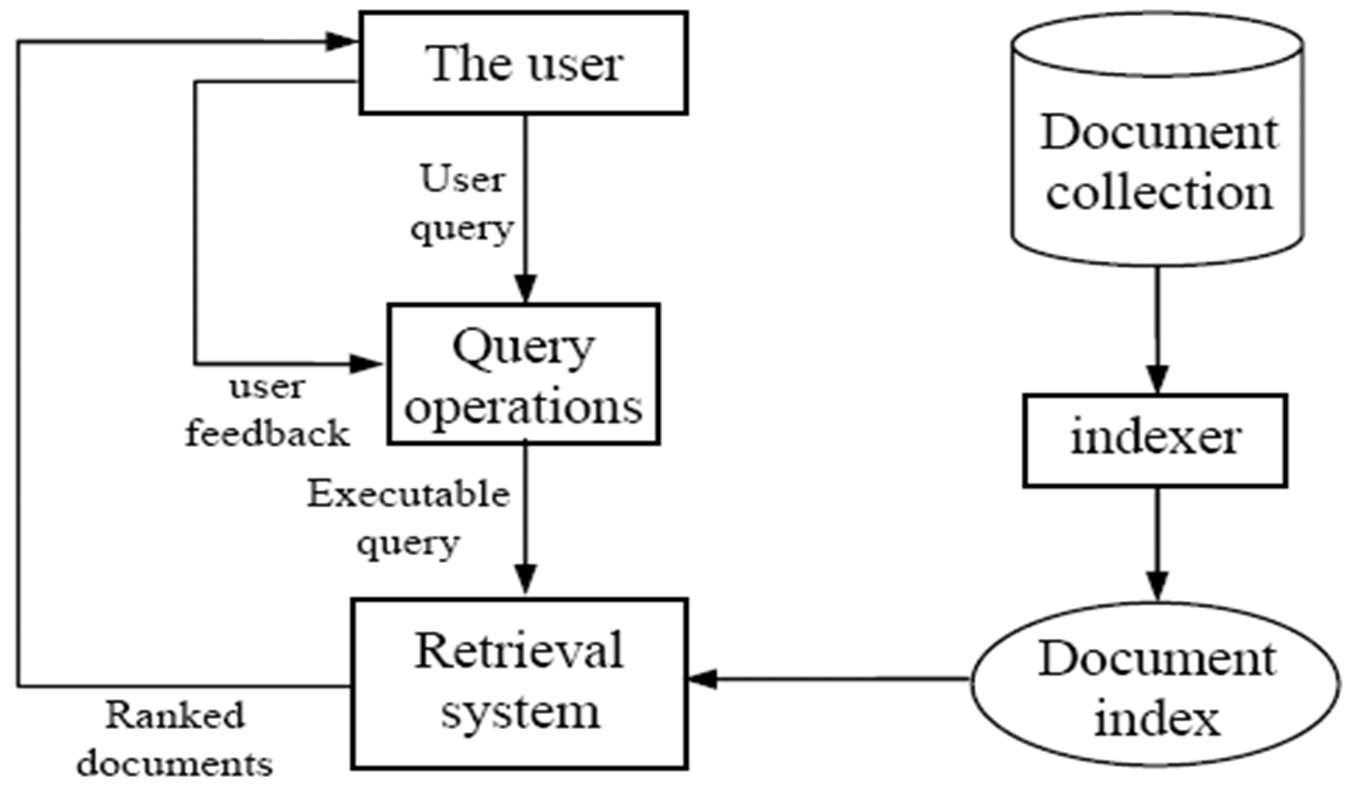

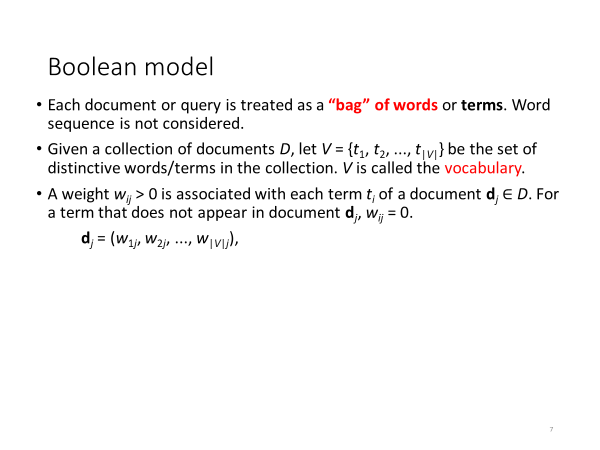

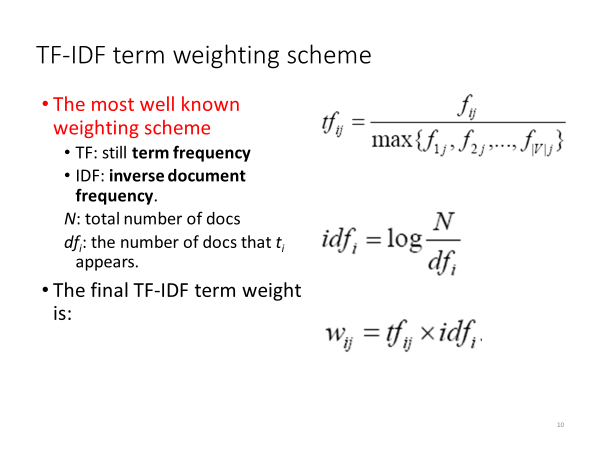

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
docs_raw = []
docs_raw.append('one fish, two fish ;)')
docs_raw.append('red fish, blue fish')
docs_raw.append('cat in the hat')
docs_raw.append('green eggs and ham')

In [ ]:
N = len(docs_raw)
N

4

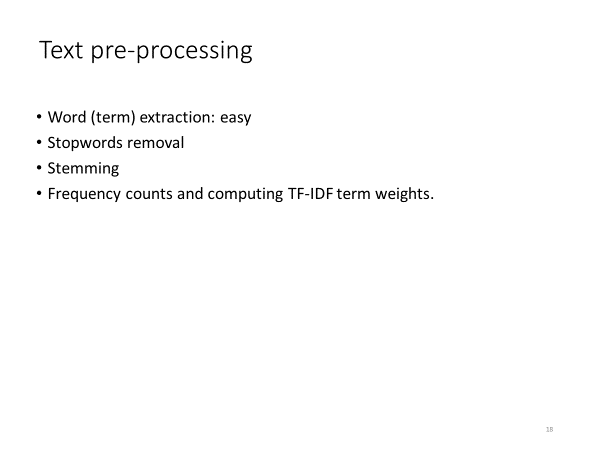

In [ ]:
stop_words = set(stopwords.words('english'))
print('-'*50, 'stop_words')
# print(stop_words[:50])
ps = PorterStemmer()
count = 0
docs_token_clean = []
vocabulary_tokenz = []
for doc in docs_raw:  
  count += 1
  print('-'*50, 'Text raw')
  print(doc)
  # Tokenizar
  tokens_doc = word_tokenize(doc)  
  print('\t', '-'*50, 'Tokenizar')
  print('\t', tokens_doc, len(tokens_doc))
  # Quitar puntuacion
  tokens_doc_wo_stop = [w for w in tokens_doc if w.isalpha()]
  print('\t', '-'*50, 'Quitar puntuacion')
  print('\t', tokens_doc_wo_stop, len(tokens_doc_wo_stop))
  # Quitar stopwords
  tokens_doc_wo_stop = [w for w in tokens_doc_wo_stop if not w.lower() in stop_words]
  print('\t', '-'*50, 'Quitar stopwords')
  print('\t', tokens_doc_wo_stop, len(tokens_doc_wo_stop))
  # Stemizar
  tokens_docs_stem = [ps.stem(w) for w in tokens_doc_wo_stop]
  print('\t', '-'*50, 'Stem')
  print('\t', tokens_docs_stem, len(tokens_doc_wo_stop))
  # Tokens definitivos
  docs_token_clean.append({'index': (count), 'text': tokens_docs_stem})
  vocabulary_tokenz += tokens_docs_stem
print('-'*50, 'Text clean')
docs_token_clean

-------------------------------------------------- stop_words
-------------------------------------------------- Text raw
one fish, two fish ;)
	 -------------------------------------------------- Tokenizar
	 ['one', 'fish', ',', 'two', 'fish', ';', ')'] 7
	 -------------------------------------------------- Quitar puntuacion
	 ['one', 'fish', 'two', 'fish'] 4
	 -------------------------------------------------- Quitar stopwords
	 ['one', 'fish', 'two', 'fish'] 4
	 -------------------------------------------------- Stem
	 ['one', 'fish', 'two', 'fish'] 4
-------------------------------------------------- Text raw
red fish, blue fish
	 -------------------------------------------------- Tokenizar
	 ['red', 'fish', ',', 'blue', 'fish'] 5
	 -------------------------------------------------- Quitar puntuacion
	 ['red', 'fish', 'blue', 'fish'] 4
	 -------------------------------------------------- Quitar stopwords
	 ['red', 'fish', 'blue', 'fish'] 4
	 ----------------------------------------

[{'index': 1, 'text': ['one', 'fish', 'two', 'fish']},
 {'index': 2, 'text': ['red', 'fish', 'blue', 'fish']},
 {'index': 3, 'text': ['cat', 'hat']},
 {'index': 4, 'text': ['green', 'egg', 'ham']}]

In [ ]:
vocabulary = set(vocabulary_tokenz)

In [ ]:
vocabulary

{'blue', 'cat', 'egg', 'fish', 'green', 'ham', 'hat', 'one', 'red', 'two'}

In [ ]:
for item in docs_token_clean:
  print(item)

{'index': 1, 'text': ['one', 'fish', 'two', 'fish']}
{'index': 2, 'text': ['red', 'fish', 'blue', 'fish']}
{'index': 3, 'text': ['cat', 'hat']}
{'index': 4, 'text': ['green', 'egg', 'ham']}


{'index': 1, 'text': ['one', 'fish', 'two', 'fish']}
{'index': 2, 'text': ['red', 'fish', 'blue', 'fish']}
{'index': 3, 'text': ['cat', 'hat']}
{'index': 4, 'text': ['green', 'egg', 'ham']}


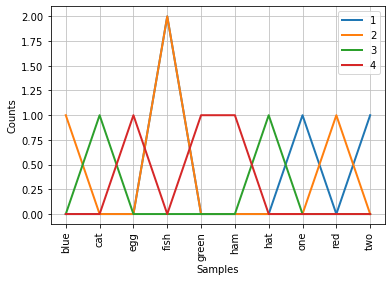

In [ ]:
from nltk.probability import ConditionalFreqDist

cdf = nltk.ConditionalFreqDist()
for num_doc in docs_token_clean:
  print(num_doc)
  condition = num_doc['index']
  for word in num_doc['text']:
    cdf[condition][word] += 1
cdf.plot()


In [ ]:
cdf.tabulate()

   blue   cat   egg  fish green   ham   hat   one   red   two 
1     0     0     0     2     0     0     0     1     0     1 
2     1     0     0     2     0     0     0     0     1     0 
3     0     1     0     0     0     0     1     0     0     0 
4     0     0     1     0     1     1     0     0     0     0 


In [ ]:
import pandas as pd
import numpy as np
df_fdist = pd.DataFrame.from_dict(cdf, orient='index').fillna(0)
df_fdist

,one,fish,two,red,blue,cat,hat,green,egg,ham
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Compute term frequencies
tf = df_fdist.divide(np.sum(df_fdist, axis=1), axis=0)

tf

,one,fish,two,red,blue,cat,hat,green,egg,ham
1,0.25,0.5,0.25,0.00,0.00,0.0,0.0,0.000000,0.000000,0.000000
2,0.00,0.5,0.00,0.25,0.25,0.0,0.0,0.000000,0.000000,0.000000
3,0.00,0.0,0.00,0.00,0.00,0.5,0.5,0.000000,0.000000,0.000000
4,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.333333,0.333333,0.333333


In [ ]:
# Compute inverse document frequencies
idf = np.log10(len(tf) / df_fdist[df_fdist > 0].count()) 

idf

one      0.60206
fish     0.30103
two      0.60206
red      0.60206
blue     0.60206
cat      0.60206
hat      0.60206
green    0.60206
egg      0.60206
ham      0.60206
dtype: float64

In [ ]:
# Compute TF-IDF vectors
tfidf = np.multiply(tf, idf.to_frame().T)

tfidf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  


,one,fish,two,red,blue,cat,hat,green,egg,ham
1,0.150515,0.150515,0.150515,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
2,0.000000,0.150515,0.000000,0.150515,0.150515,0.00000,0.00000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.30103,0.30103,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.200687,0.200687,0.200687


{'query': 10, 'text': ['one', 'fish', 'hat', 'hat']}


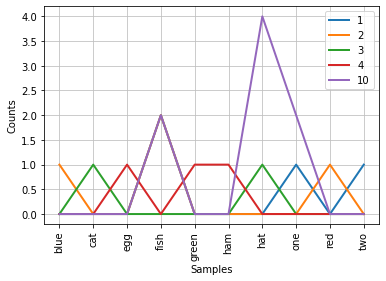

In [ ]:
query = [{'query': 10, 'text': ["one", "fish", "hat", "hat"]}]

#cdf_2 = nltk.ConditionalFreqDist()
for num_doc in query:
  print(num_doc)
  condition = num_doc['query']
  for word in num_doc['text']:
    cdf[condition][word] += 1
cdf.plot()
#df_fdist

In [ ]:
cdf.tabulate()

    blue   cat   egg  fish green   ham   hat   one   red   two 
 1     0     0     0     2     0     0     0     1     0     1 
 2     1     0     0     2     0     0     0     0     1     0 
 3     0     1     0     0     0     0     1     0     0     0 
 4     0     0     1     0     1     1     0     0     0     0 
10     0     0     0     2     0     0     4     2     0     0 


In [ ]:
import pandas as pd
import numpy as np
df_fdist = pd.DataFrame.from_dict(cdf, orient='index').fillna(0)
df_fdist

,one,fish,two,red,blue,cat,hat,green,egg,ham
1,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [ ]:
# Compute term frequencies
tf = df_fdist.divide(np.sum(df_fdist, axis=1), axis=0)

# Compute inverse document frequencies
idf = np.log10(len(tf) / df_fdist[df_fdist > 0].count()) 

# Compute TF-IDF vectors
tfidf_2 = np.multiply(tf, idf.to_frame().T)

tfidf_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  


,one,fish,two,red,blue,cat,hat,green,egg,ham
1,0.099485,0.110924,0.174743,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000
10,0.099485,0.055462,0.000000,0.000000,0.000000,0.000000,0.19897,0.00000,0.00000,0.00000
2,0.000000,0.110924,0.000000,0.174743,0.174743,0.000000,0.00000,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.349485,0.19897,0.00000,0.00000,0.00000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.23299,0.23299,0.23299


In [ ]:
tfidf_2.loc[[10]].values[0]

array([0.099485  , 0.05546219, 0.        , 0.        , 0.        ,
       0.        , 0.19897   , 0.        , 0.        , 0.        ])

In [ ]:
def cosine_similarity(a, b):
    nom = np.sum(np.multiply(a, b))
    denom = np.sqrt(np.sum(np.square(a))) * np.sqrt(np.sum(np.square(b)))
    sim = nom / denom
    return sim



In [ ]:
print('10 - 10', cosine_similarity(tfidf_2.loc[[10]].values[0], tfidf_2.loc[[10]].values[0]))
print('10 - 1 ', cosine_similarity(tfidf_2.loc[[10]].values[0], tfidf_2.loc[[1]].values[0]))
print('10 - 2 ',cosine_similarity(tfidf_2.loc[[10]].values[0], tfidf_2.loc[[2]].values[0]))
print('10 - 3 ',cosine_similarity(tfidf_2.loc[[10]].values[0], tfidf_2.loc[[3]].values[0]))
print('10 - 4 ',cosine_similarity(tfidf_2.loc[[10]].values[0], tfidf_2.loc[[4]].values[0]))

10 - 10 1.0000000000000002
10 - 1  0.3048352879326449
10 - 2  0.09906381933071214
10 - 3  0.4293821399478049
10 - 4  0.0
